When there are millions of features for training instance, it makes harder to find optimal solution and the training process will be very slow and this is referred as the curse of dimensionality.

In real-world problems, we can reduce number of features considerably but reducing dimensionality does lose some information making the model a bit worse. It also makes the pipelines a bit more complex and thus harder to maintain. 

High dimensional datasets are at risk of being very sparse, which means a new instance will likely be far away from any training instances, making predictions much less reliable than in lower dimensions. 

The more dimensions the training set has, the greater the risk of overfitting it.


#### Projection

We can project the training instances into a much lower-dimensional subspace of the high-dimensional space.

However, projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset. 


#### Manifold Learning
It is based on the idea that high-dimensional data often lie on or near a lower-dimensional manifold within the higher-dimensional space.


### PCA

PCA stands for Principal Component Analysis that identifies the hyperplane that lies closest to the data and then it projects the data onto it.

Steps:
1. Standardize the data.

2. Compute the covariance matrix. (Diagonal of covariance matrix consists variances and remaining elements consists of covariance. It is square matrix which provides a measure of the degree to which to random variables or features in a dataset vary together.)

3. Compute the Eigenvalues and Eigenvectors of the covariance matrix.

4. Select the top k Eigenvectors that corresponds largest eigenvalues. (Eigenvalues explains about variance)

5. Transform the data onto the subspaces created by the top k eigenvectors by dot multplication of transpose of principle component and standardize data.

In [1]:
import numpy as np

np.random.seed(42)
m=60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m)*3*np.pi/2-0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [3]:
X2D

array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852],
       [-0.79710027,  0.26718188],
       [-0.55173939,  0.65062721],
       [ 1.41612959,  0.16567641],
       [ 0.40776059, -0.46053322],
       [ 0.85209856, -0.40516935],
       [-0.46269946,  0.61952736],
       [ 1.2826692 ,  0.41018903],
       [ 1.37468032,  0.03618608],
       [-0.96941594,  0.10932241],
       [-0.97219266,  0.14390464],
       [-1.05216924,  0.07740862],
       [-0.92770444, -0.22364286],
       [-0.01473543, -0.4153169 ],
       [-0.47010859, -0.46920058],
       [-0.87761843, -0.08515546],
       [ 0.38973612, -0.45189716],
       [-0.96989867,  0.19819051],
       [-0.93689997, -0.09307933],
       [-0.81304146, -0.26096051],
       [-0.41368569, -0.42009096],
       [ 1.2830484 , -0.02603822],
       [-0.95210787,  0.23163682],
       [-0.2005476 , -0.49130242],
       [ 0.33988682,

In [4]:
X3D_inv = pca.inverse_transform(X2D)

In [5]:
np.allclose(X3D_inv, X)

False

In [6]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.009421417196957216

In [7]:
pca.components_

array([[-0.95250178, -0.24902446, -0.17529172],
       [ 0.29267159, -0.9076305 , -0.30091563]])

In [8]:
pca.components_.T[0]

array([-0.95250178,  0.29267159])

In [9]:
pca.explained_variance_ratio_ # it indicatest the proportion of the dataset's variance that lies along the axis of each principle component

array([0.85406025, 0.13622918])

In [10]:
np.sum(pca.explained_variance_ratio_)

0.9902894323839865

In [11]:
(1 - np.sum(pca.explained_variance_ratio_)) * 100

0.9710567616013521

In [12]:
# Third axis only carries 0.97% of the variance, meaning it containes very little information

In [13]:
pca = PCA(n_components=None) # Default is also None, so we can leave it also.
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) # cumulutive sum

In [14]:
cumsum

array([0.85406025, 0.99028943, 1.        ])

In [15]:
np.argmax(cumsum >= 0.95) + 1 # adding 1 for countering indexing

2

In [16]:
# More easy way is to set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

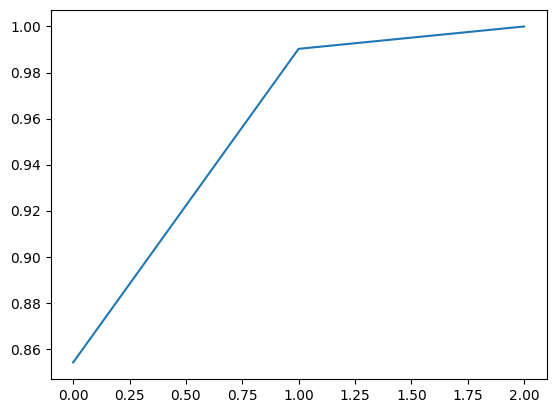

In [17]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(cumsum)

#### MNIST Dataset compression

In [18]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [19]:
pca = PCA(n_components=0.95)
X_mnist_reduced = pca.fit_transform(mnist["data"])

In [20]:
pca.n_components_

154

In [21]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [22]:
X_recovered = pca.inverse_transform(X_mnist_reduced)

Text(0.5, 1.0, 'Compressed')

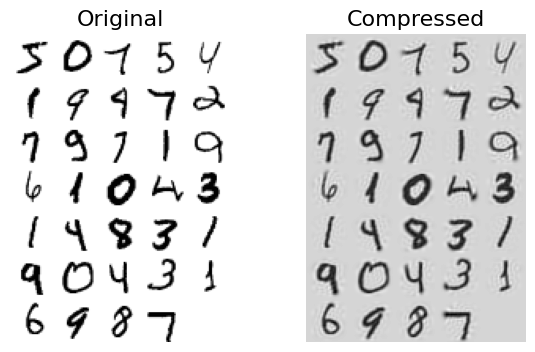

In [23]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(mnist.data[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

#### Incremental PCA

One problem with the preceding implementation of PCA is it requires the whole training set to fit in memory. 

We can use Incremental PCA(IPCA) algorithms that split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. 

In [24]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(mnist.data, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_mnist_reduced = inc_pca.transform(mnist.data)

In [72]:
X_mm = np.memmap("my_mnist.data", dtype='float32', mode='write', shape=mnist["data"].shape)

In [73]:
#  Deleting the memmap() object will trigger its Python finalizer, which ensures that the data is saved to disk.
del X_mm

In [74]:
X_mm = np.memmap("my_mnist.data", dtype='float32', mode='readonly', shape=mnist["data"].shape)

m, n = mnist["data"].shape

batch_size = m//n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

D:\ML\lib\site-packages\sklearn\decomposition\_incremental_pca.py:338: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio = S ** 2 / np.sum(col_var * n_total_samples)


IncrementalPCA(batch_size=700, n_components=154)

#### Randomized PCA

It a stochastic algorithm that quickly finds an approximation of the first d principal components. Its computational complexity is O(m x d^2) + O(d^3) instead of O(m x n^2) + O(n^3), so it is dramatically faster than the previous algorithms when d is much smaller than n.

In [25]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(mnist.data)

#### Kernel PCA

PCA is a linear method so it can only be applied to datasets which are linearly separable. So, when using PCA to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction.

Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly seperabe. 


Choosing an appropriate kernel function and its corresponding parameters, which can be difficult and time-consuming.

KPCA can also be computationally expensive for large datasets, as it requires the computation of the kernel matrix for all pairs of data points.

In [26]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [27]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

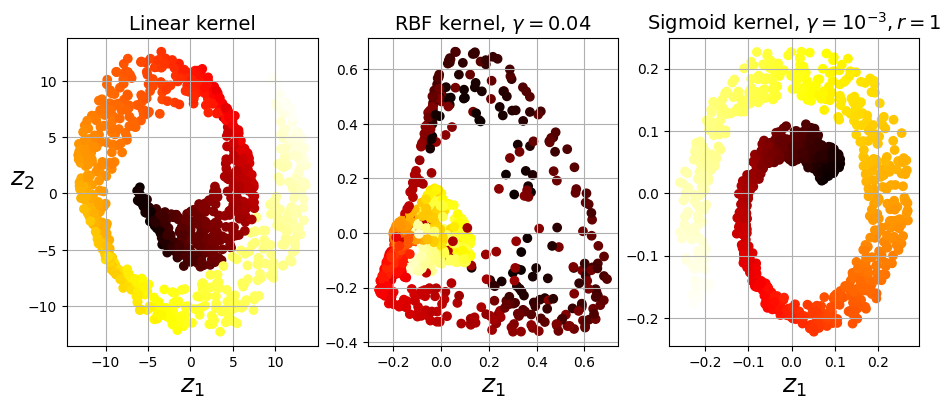

In [29]:
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)


y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

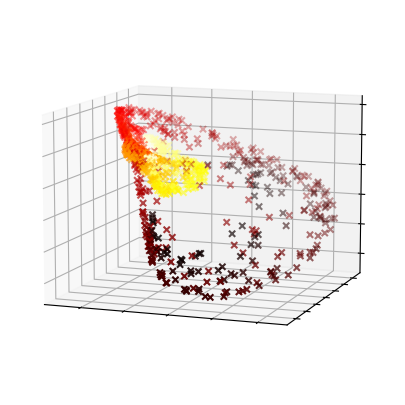

In [30]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

#### Selecting a Kernel and Tuning Hyperparameters

As kPCA is an unsupervised learning algorithm, there is no performance measure that helps us to select best kernel and hyperparameter values. However, we can use grid search to select the kernel and hyperparameters, making it a supervised learning task.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [38]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

Another approach, entirely unsupervised, is to select the kernel and hyperparameters that yield the lowest reconstruction error.

We can do this by training a supervised regression model, with the projected instances as the training set and the original instances as the targets. 

Scikit-Learn will do this automatically if we set fit_inverse_transform=True.

In [39]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [40]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766125

Now we can use grid search with cross-validation to find the kernel and hyperparameters that minimize this pre-image reconstruction error.

### LLE

LLE stands for Locally Linear Embedding is a Manifold Learning technique. It works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. 

In [42]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

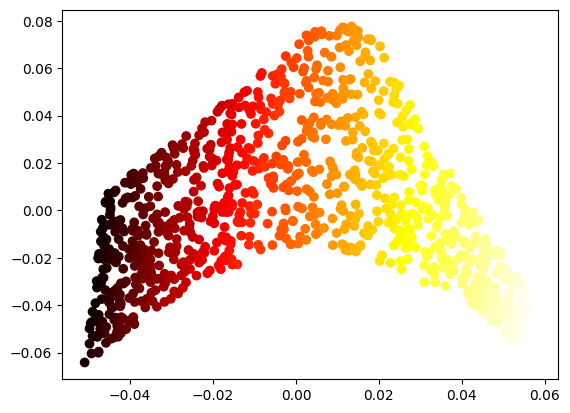

In [47]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.show()

#### Other Dimenionality Reduction Techniques

#### 1. Multidimensional Scaling(MDS)
It reduces dimensionality while trying to preserve the distances between the instance.

#### 2. Isomap
It creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between the instances.
(The geodesic distance between two node in a graph is the number of nodes on the shortest path between these nodes.)


#### 3. t-Distributed Stochastic Neighbor Embedding (t-SNE)
It reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.

#### 4. Linear Discriminant Analysis (LDA)
It is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit is that the projection will keep classes as far apart as possible, so LDA is a  good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.

### Exercise

 1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?
 --> To speed up training process. To visualize the data and gain insights. To save space. To reduce overfitting as at higher dimensions, model become overly complex, fitting to the noise rather than the underlying pattern.
 
 Drawbacks: 1. Some information is lost. Can be computationally intensive. Transformed Features are often hard to interpret.
___


 2. What is the curse of dimensionality?
 --> Randomly sampled high-dimensional vectors are generally very sparse, increasing the risk of overfitting and making it very difficult to identify patterns in the data.
 ___
 
 
 3.  Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?
 --> It is almost always impossible to perfectly reverse the operation because some information gets lost. While some algorithms such as PCA have a simple reverse transformation procedure that can reconstruct a dataset relatively similar to the original.
 
___


 4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?
 --> PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear as it can get rid of useless dimensions. However, if there are no useless dimensions, then it will cause too much loss of information.
 ___
 
 
  5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?
  --> We can't say this without looking the dataset. It could be any number between 1 and 1000.
  ___
  
 
 6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?
 --> Regular PCA works only if the dataset fits in the memory.  Incremental PCA is useful for large datasets that don't fit in memory, but it is slower than regular PCA. It is also useful for online tasks. Randomized PCA is useful when you want to considerably reduce dimensionality and the dataset fits in memory. Kernel PCA is useful for non-linear datasets.
 ___
 
 
 7.  How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?
 --> We can apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. So, if we are having the dimensionality reduction as a preprocessing step, then we can simply measure the performance of the second algorithm. If dimensionality reduction didn't lose too much information, then the algorithm should perform just as well as when using the original dataset.
 ___
 
 
 8. Does it make any sense to chain two different dimensionality reduction algorithms?
 --> It absoulutely make sense to chain two different dimensionality reduction algorithms. A common example is using PCA to quickly get rid of a large number of useless dimensions, then applying LLE will likely to yield the same performance as using LLE only, but in a fraction of the time.

### 9
Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [62]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [63]:
X = mnist.data
y = mnist.target

In [64]:
print(len(X))

70000


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [67]:
start = time.time()
rnd_clf.fit(X_train, y_train)
stop = time.time()

In [68]:
stop-start

3.5339372158050537

In [69]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9465

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [71]:
rnd_clf_pca = RandomForestClassifier(n_estimators=10, random_state=42)
start = time.time()
rnd_clf_pca.fit(X_train_reduced, y_train)
stop = time.time()

In [72]:
stop-start

7.410016775131226

In [74]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.891

### 10
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [75]:
np.random.seed(42)

idx = np.random.permutation(60000)[:10000]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [76]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

D:\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


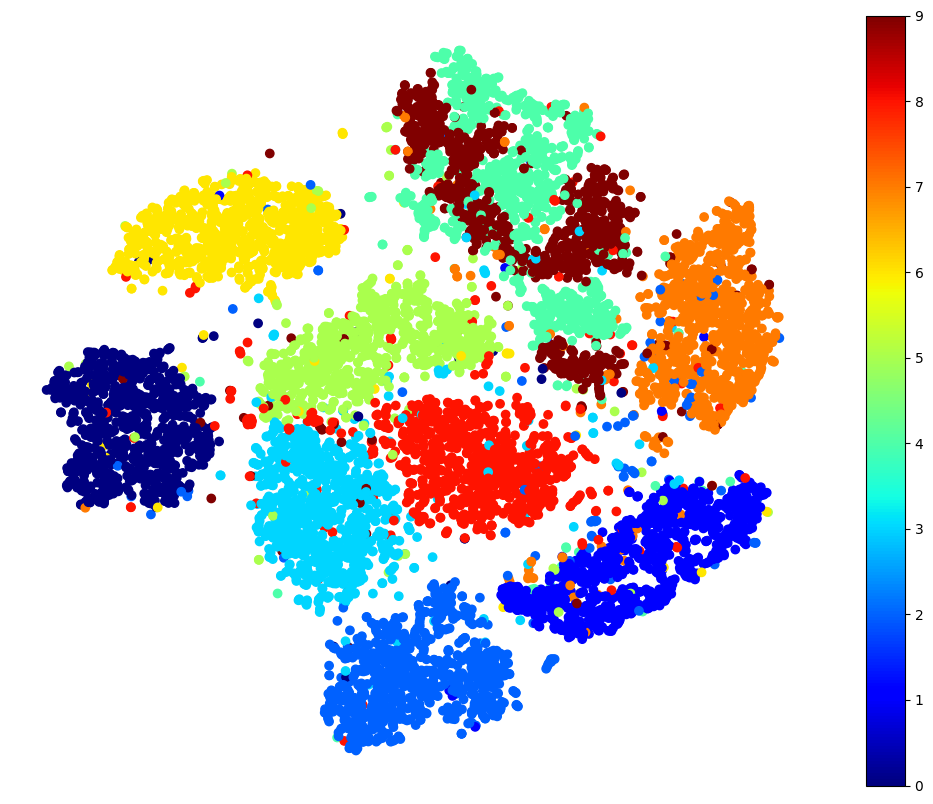

In [77]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [80]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

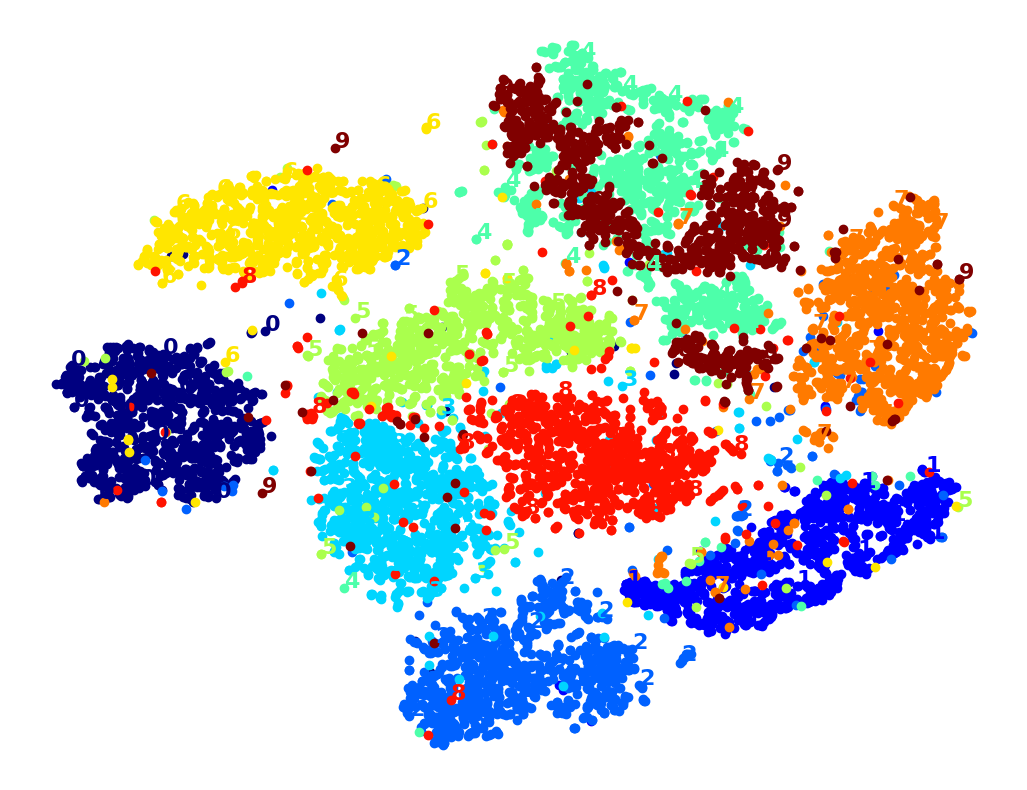

In [81]:
plot_digits(X_reduced, y)

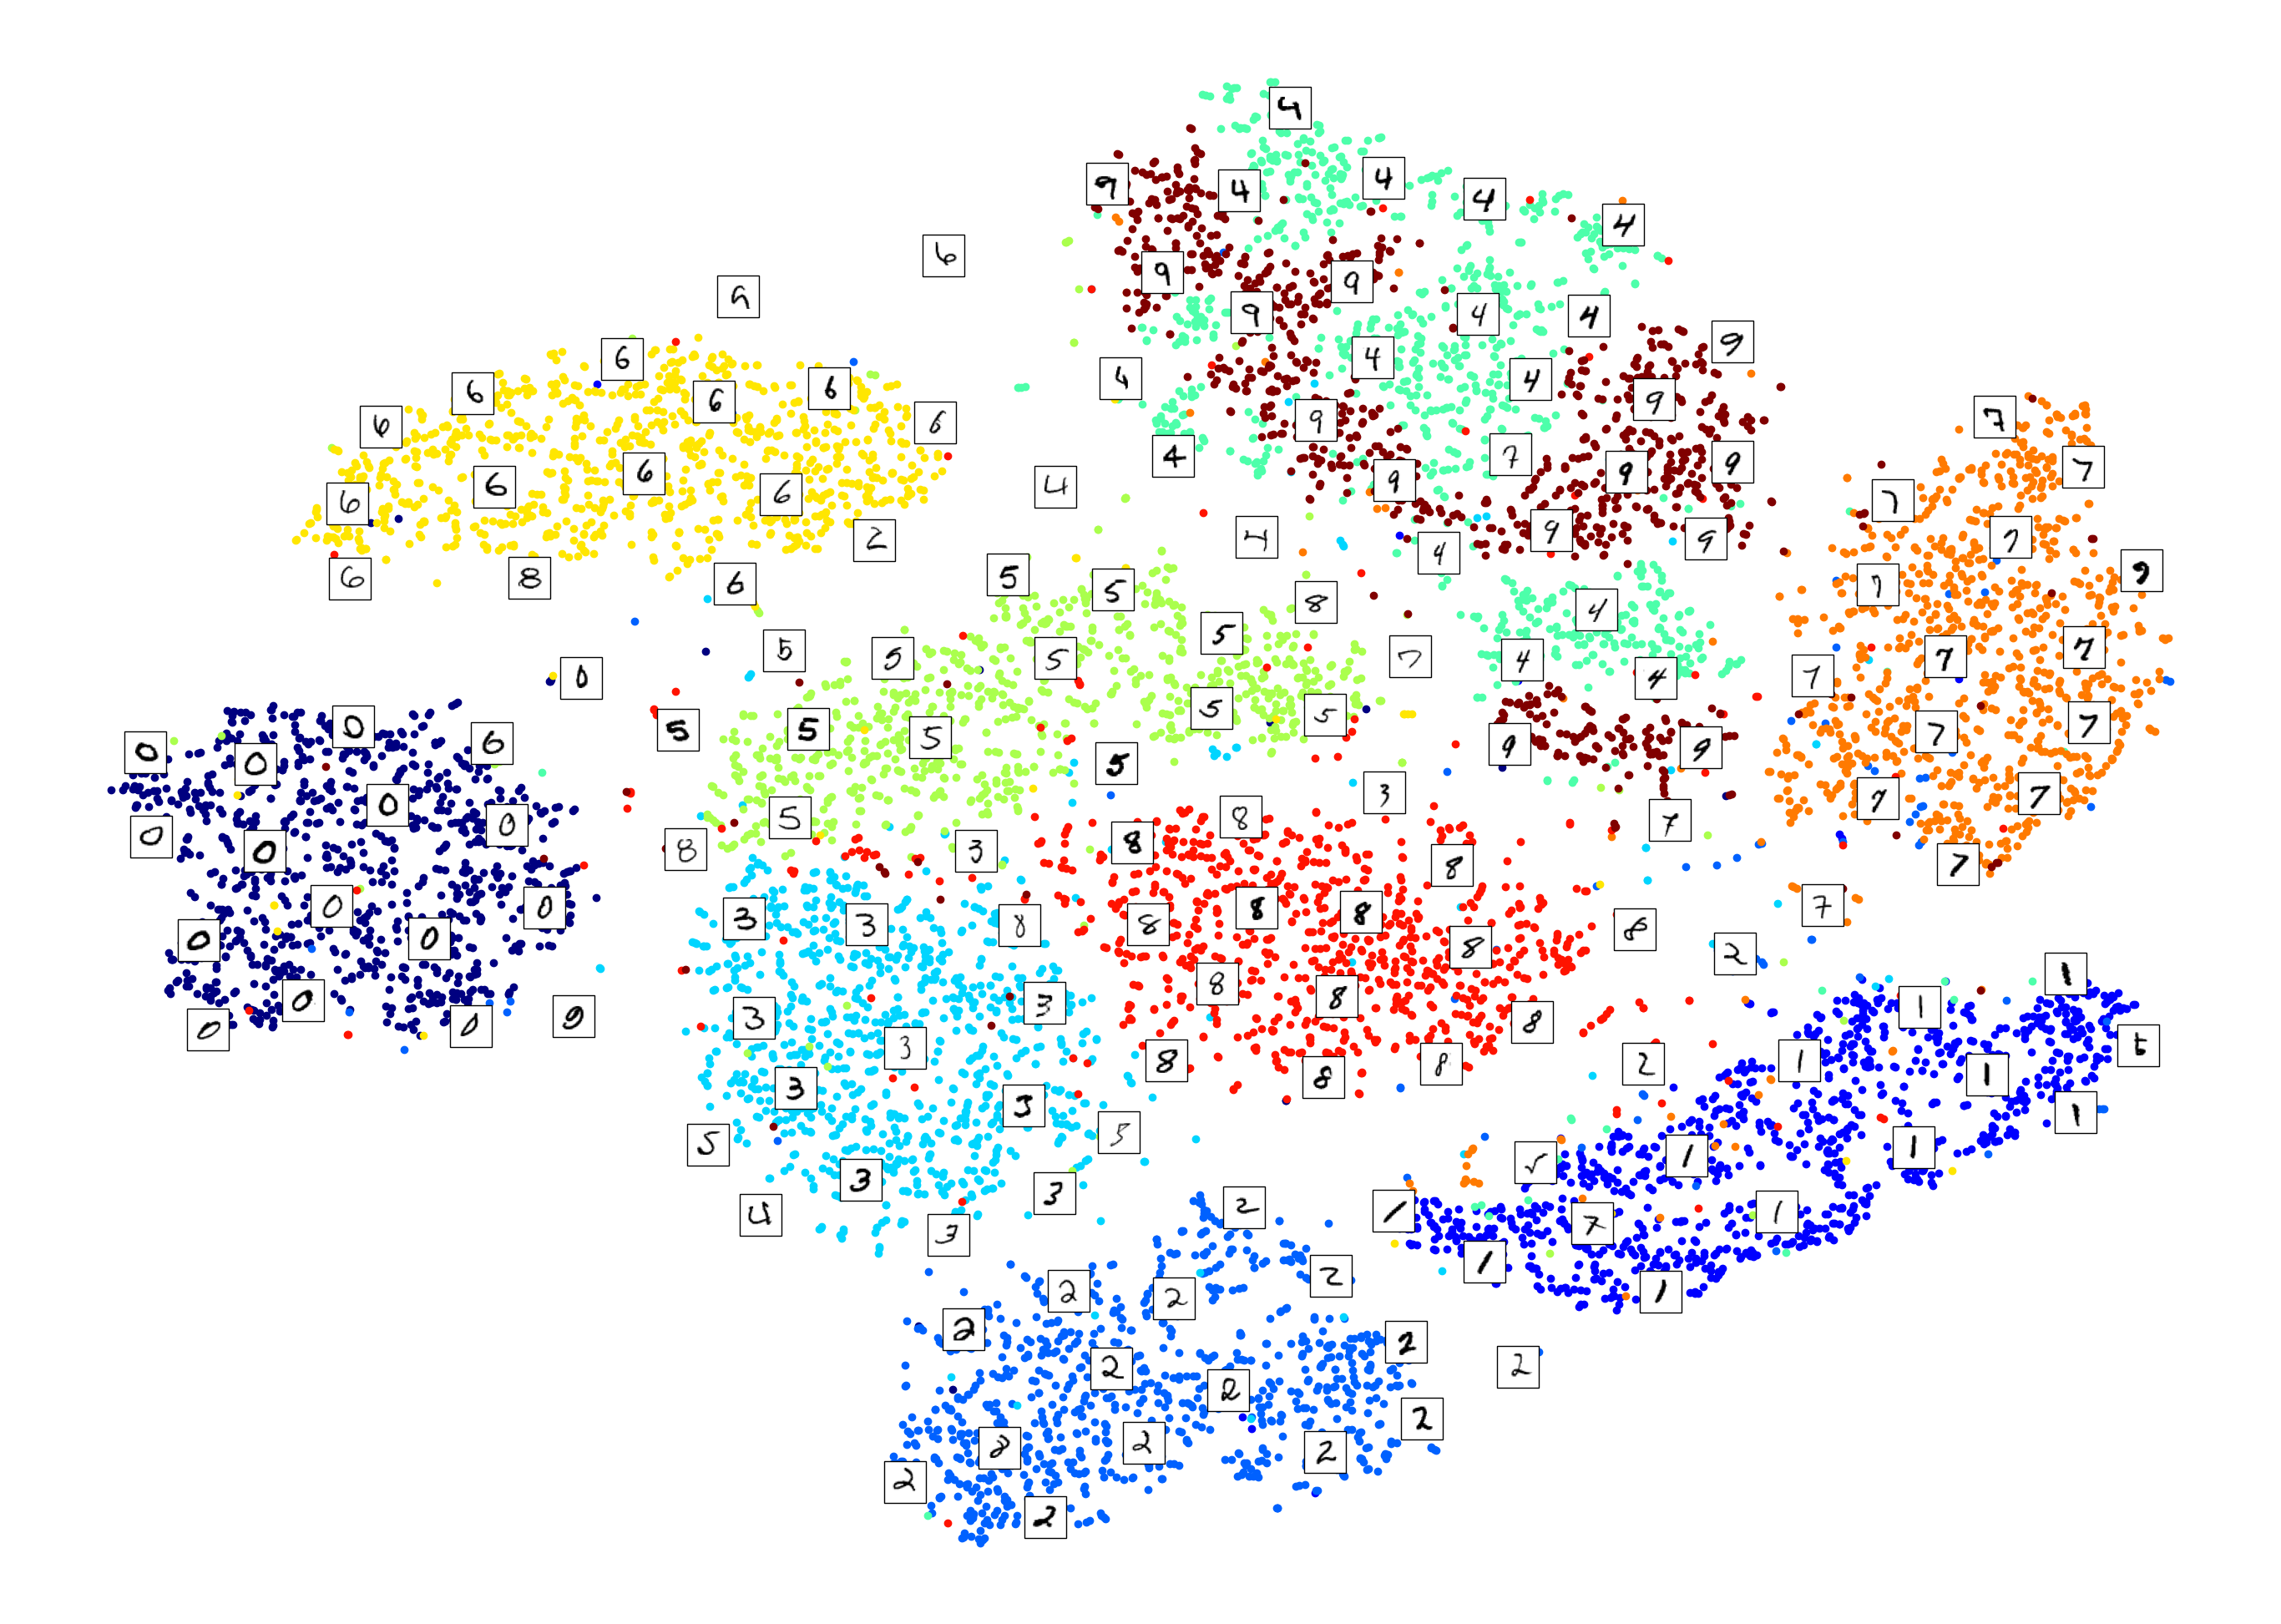

In [82]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

PCA = 0.31691431999206543 seconds.


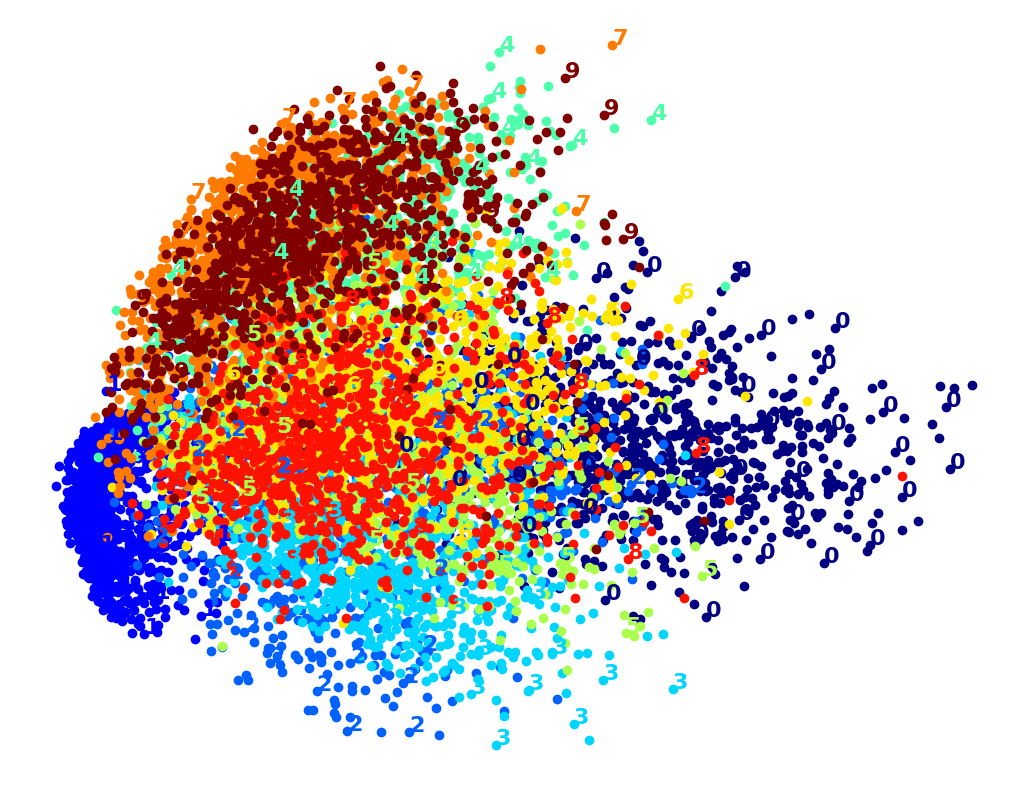

In [84]:
from sklearn.decomposition import PCA
import time

start = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
stop = time.time()
print(f"PCA = {stop-start} seconds.")
plot_digits(X_pca_reduced, y)
plt.show()

LLE = 37.87325692176819 seconds.


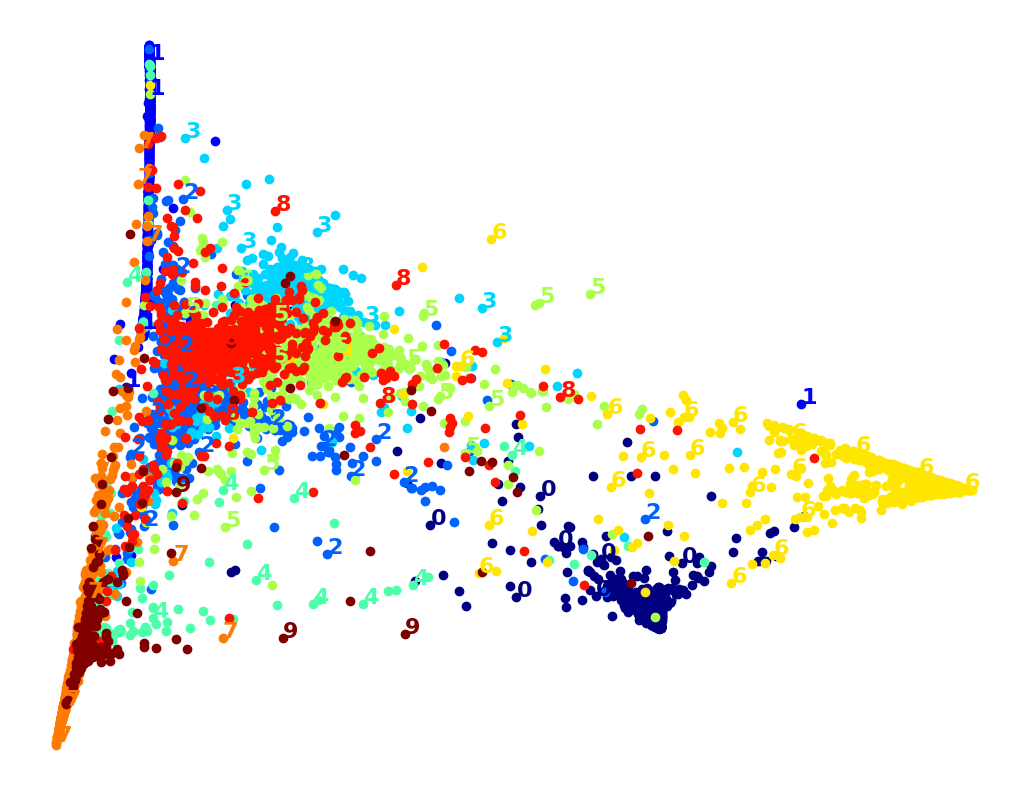

In [85]:
from sklearn.manifold import LocallyLinearEmbedding

start = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
stop = time.time()
print(f"LLE = {stop-start} seconds.")
plot_digits(X_lle_reduced, y)
plt.show()

PCA + LLE = 46.29068446159363 seconds.


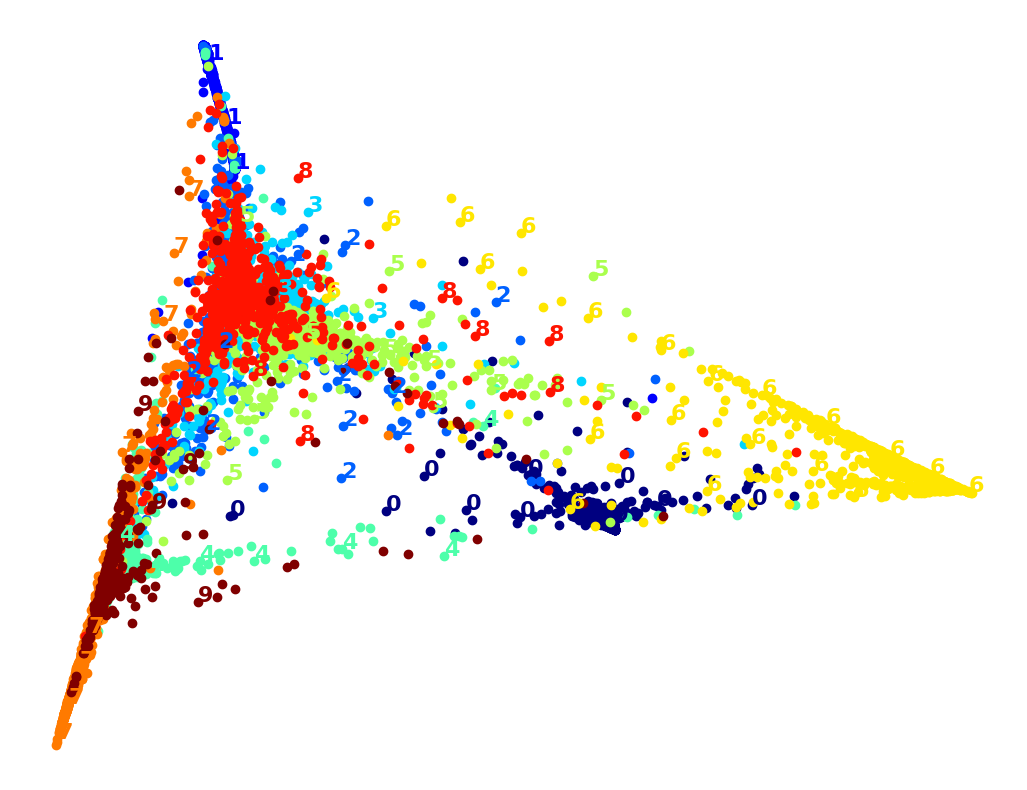

In [89]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])


start = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
stop = time.time()
print(f"PCA + LLE = {stop-start} seconds.")
plot_digits(X_pca_lle_reduced, y)
plt.show()

MDS = 133.6724579334259 seconds.


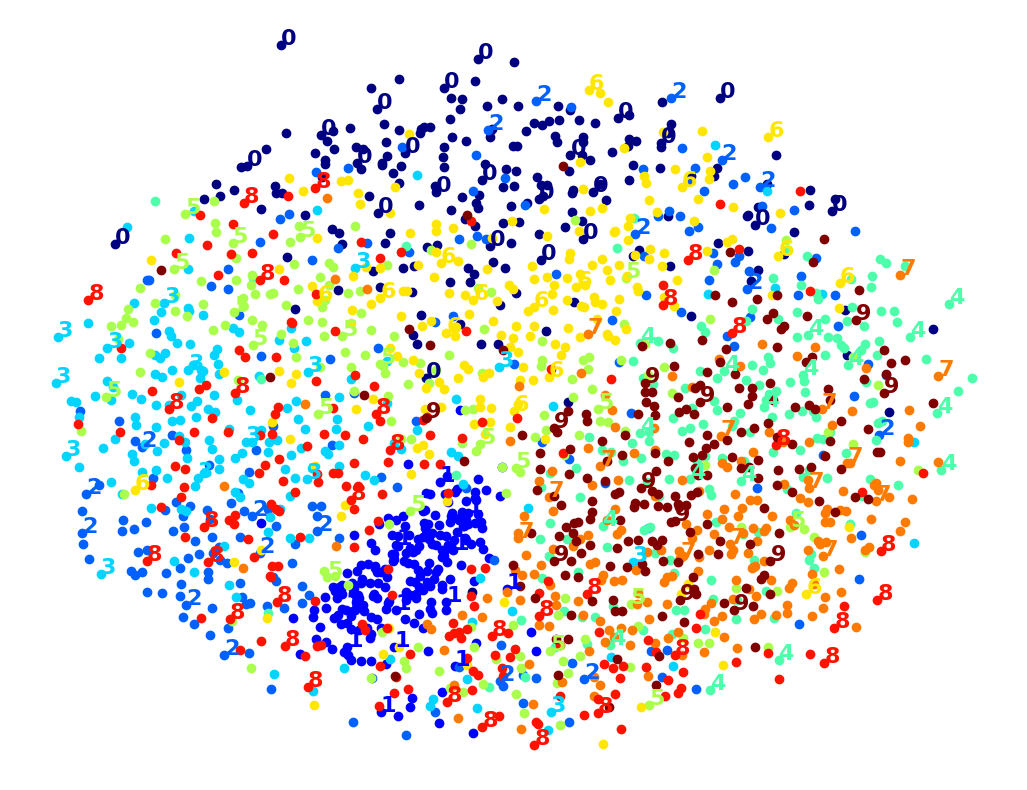

In [88]:
from sklearn.manifold import MDS

m = 2000
start = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
stop = time.time()
print(f"MDS = {stop-start} seconds.")
plot_digits(X_mds_reduced, y[:m])
plt.show()

PCA + MDS = 141.7695813179016 seconds.


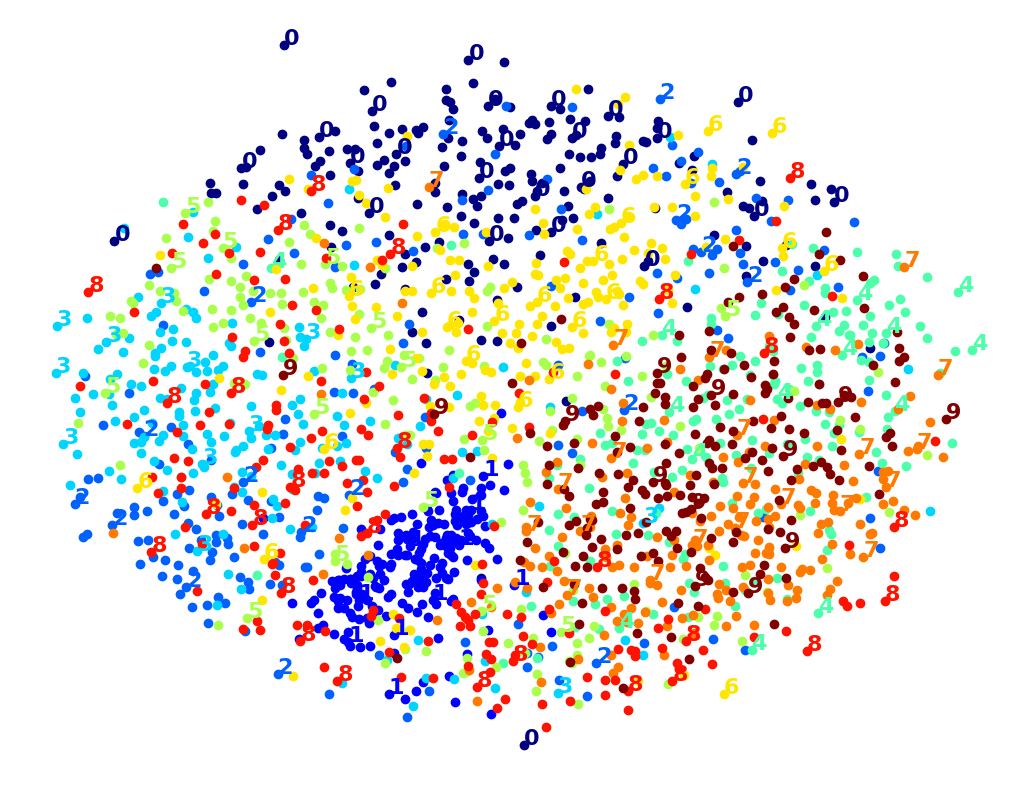

In [90]:
pca_mds = Pipeline([
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("mds",  MDS(n_components=2, random_state=42)),
])


start = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:m])
stop = time.time()
print(f"PCA + MDS = {stop-start} seconds.")
plot_digits(X_pca_mds_reduced, y[:m])
plt.show()

LDA = 1.7959191799163818 seconds.


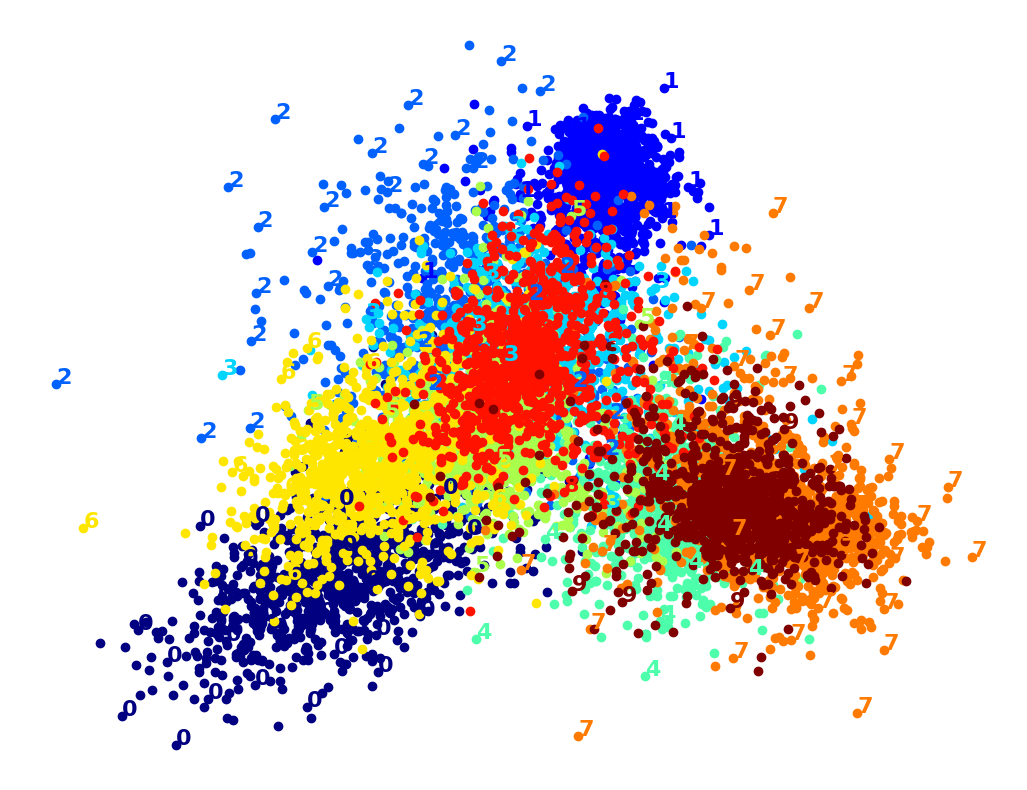

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

start = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
stop = time.time()
print(f"LDA = {stop-start} seconds.")
plot_digits(X_lda_reduced, y)
plt.show()

D:\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE=43.27532410621643 seconds.


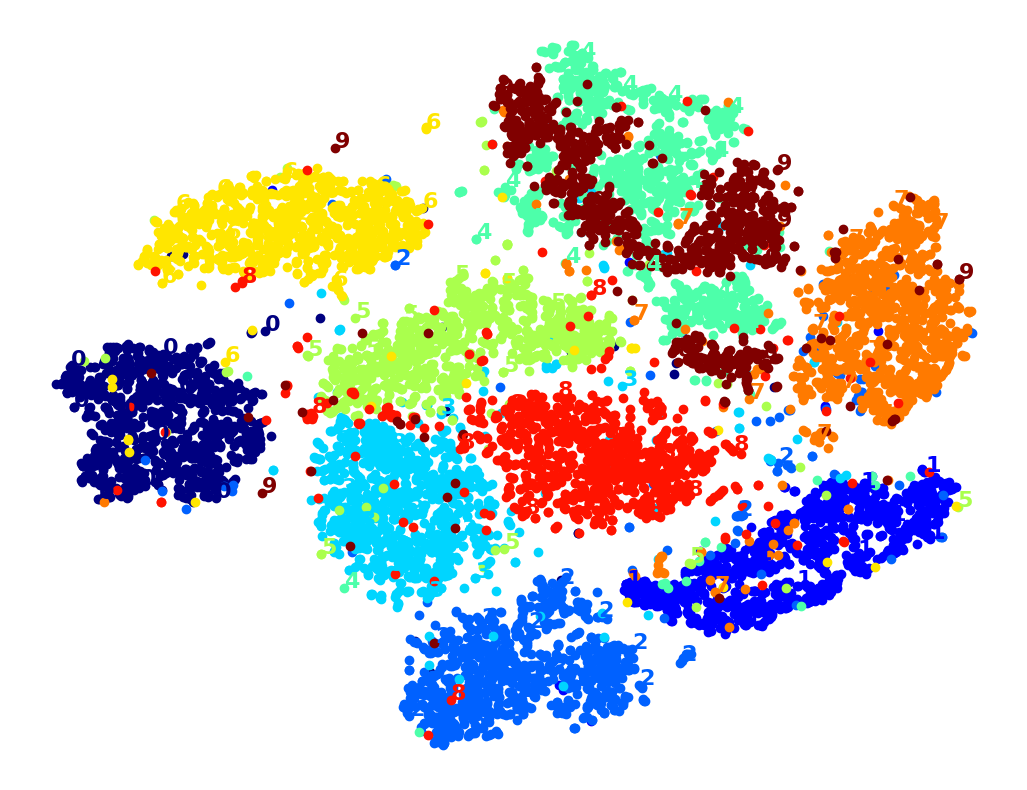

In [93]:
start = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne_reduced = tsne.fit_transform(X)
stop = time.time()

print(f"TSNE={stop-start} seconds.")
plot_digits(X_tsne_reduced, y)
plt.show()

D:\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


PCA + TSNE = 48.684577226638794 seconds.


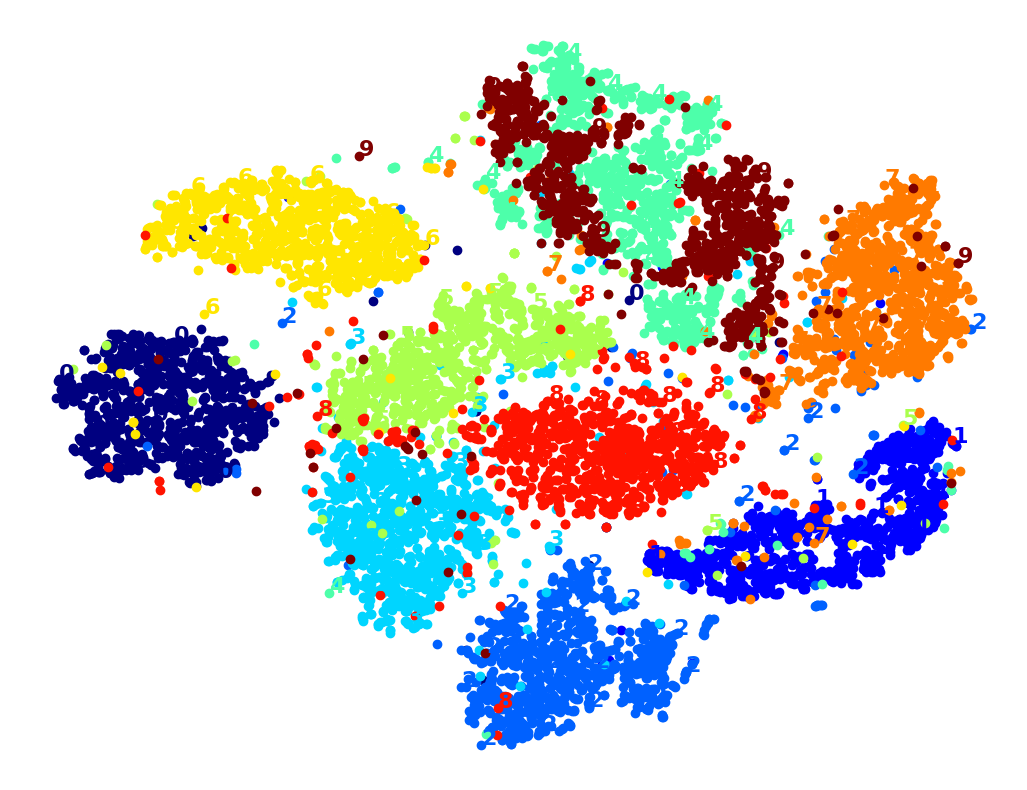

In [94]:
pca_tsne = Pipeline([
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("tsne",  TSNE(n_components=2, random_state=42)),
])


start = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
stop = time.time()
print(f"PCA + TSNE = {stop-start} seconds.")
plot_digits(X_pca_tsne_reduced, y)
plt.show()